### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Total missing values: 13370
Number of duplicate rows: 74
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count

<Axes: >

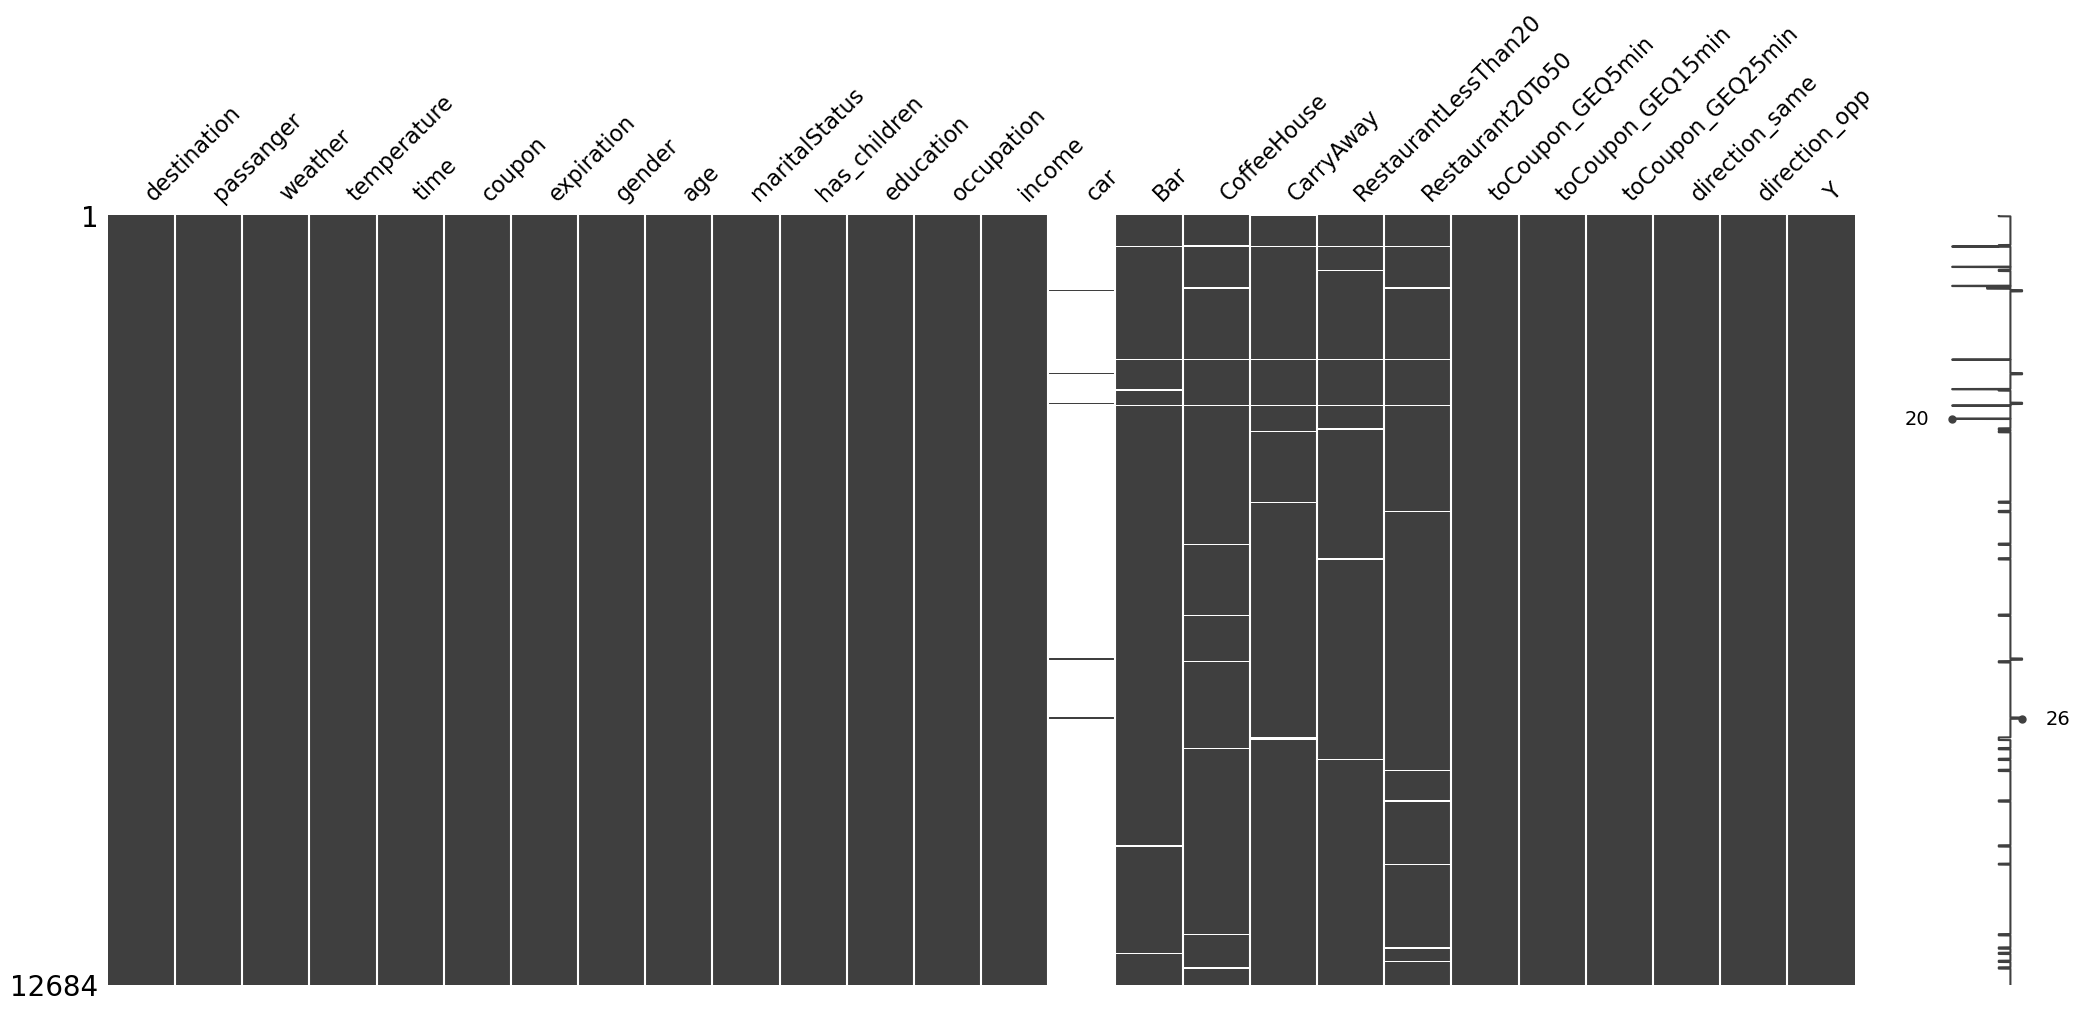

In [4]:
# Check total missing values per column
print(data.isnull().sum())

# Check total missing values in entire dataset
print("Total missing values:", data.isnull().sum().sum())

# Check for duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())

# Check data types and non-null counts
print(data.info())

# Check min, max, mean, std — can help spot outliers or invalid values
print(data.describe())

# For each object (string/categorical) column, check unique values
for col in data.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())

# Install missingno (if not installed)
# pip install missingno

import missingno as msno

# Visualize missing values
msno.matrix(data)



3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop rows with any NaN values
data_cleaned = data.dropna()
data_cleaned.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1


In [6]:
print(data_cleaned.columns)


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


4. What proportion of the total observations chose to accept the coupon?

In [7]:
# Calculate proportion of accepted coupons
proportion_accepted = data_cleaned['Y'].mean()

print(f"Proportion of accepted coupons: {proportion_accepted:.2f}")


Proportion of accepted coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

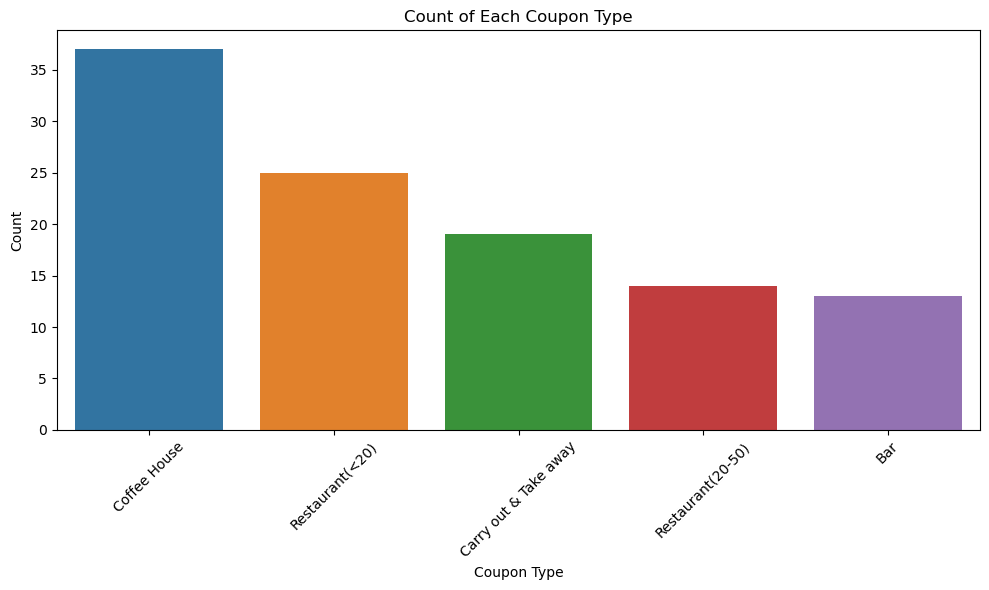

In [8]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create a count bar plot of the 'coupon' column
sns.countplot(data=data_cleaned, x='coupon', order=data_cleaned['coupon'].value_counts().index)

# Add plot title and labels
plt.title('Count of Each Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

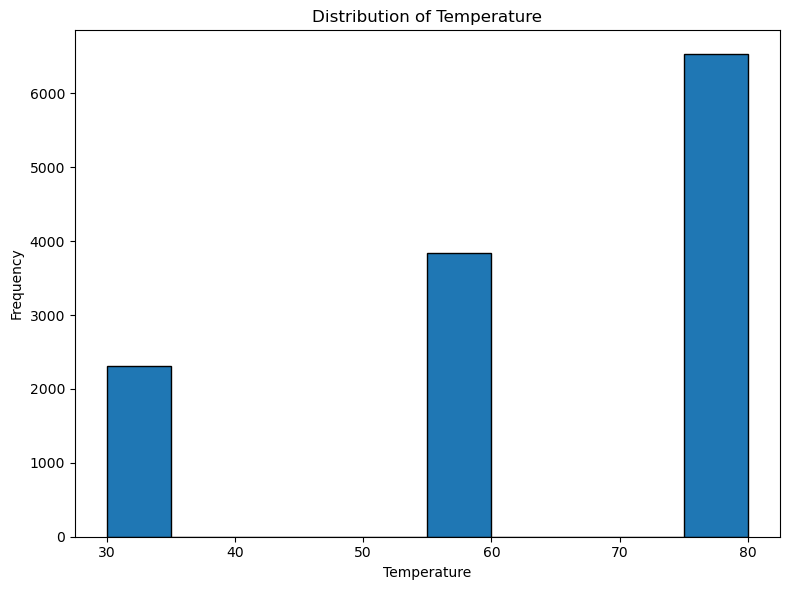

In [9]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Plot histogram
plt.hist(data['temperature'], bins=10, edgecolor='black')

# Add plot title and labels
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
# Filter the data for rows where coupon type is 'Bar'
bar_data = data_cleaned[data_cleaned['coupon'] == 'Bar']

# Check the first few rows to confirm
print(bar_data.head())


          destination  passanger weather  temperature  time coupon expiration  \
1239  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
1250             Home      Alone   Sunny           55   6PM    Bar         1d   
1254             Work      Alone   Sunny           55   7AM    Bar         1d   
2613  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
2617             Home      Alone   Sunny           55   6PM    Bar         1d   

      gender age    maritalStatus  ...  CoffeeHouse CarryAway  \
1239    Male  26           Single  ...          4~8       4~8   
1250    Male  26           Single  ...          4~8       4~8   
1254    Male  26           Single  ...          4~8       4~8   
2613  Female  41  Married partner  ...          1~3       1~3   
2617  Female  41  Married partner  ...          1~3       1~3   

     RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
1239                  1~3            neve

2. What proportion of bar coupons were accepted?


In [11]:
print(bar_data.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [12]:
bar_test=bar_data["Bar"]
bar_test.head(50)

1239    less1
1250    less1
1254    less1
2613    never
2617    never
2621    never
3101    never
3105    never
3109    never
7313      gt8
7321      gt8
8284    never
8292    never
Name: Bar, dtype: object

In [13]:
# Calculate proportion of accepted bar coupons
proportion_bar_accepted = bar_data['Y'].mean()

print(f"Proportion of accepted bar coupons: {proportion_bar_accepted:.2f}")


Proportion of accepted bar coupons: 0.23


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
# Create a mapping from text to estimated numeric frequency
bar_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Map the values to a new column
bar_data['bar_freq_num'] = bar_data['Bar'].map(bar_mapping)

# Split into low and high frequency groups
low_freq = bar_data[bar_data['bar_freq_num'] <= 3]
high_freq = bar_data[bar_data['bar_freq_num'] > 3]

print("Low frequency acceptance:", low_freq['Y'].mean())
print("High frequency acceptance:", high_freq['Y'].mean())


# Group 1: 3 or fewer times a month
#low_freq = bar_data[bar_data['Bar'] <= 3]

# Group 2: more than 3 times a month
#high_freq = bar_data[bar_data['Bar'] > 3]

# Calculate acceptance rates
#low_freq_acceptance = low_freq['Y'].mean()
#high_freq_acceptance = high_freq['Y'].mean()

#print(f"Acceptance rate (≤3 visits/month): {low_freq_acceptance:.2f}")
#print(f"Acceptance rate (>3 visits/month): {high_freq_acceptance:.2f}")


Low frequency acceptance: 0.09090909090909091
High frequency acceptance: 1.0


/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_82845/2833899187.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['bar_freq_num'] = bar_data['Bar'].map(bar_mapping)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate (bar >1/month & age >25): 1.00
Acceptance rate (all others): 0.09
Difference in acceptance rate: 0.91


/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_82845/2055273797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data['age_num'] = bar_data['age'].str.extract(r'(\d+)').astype(float)


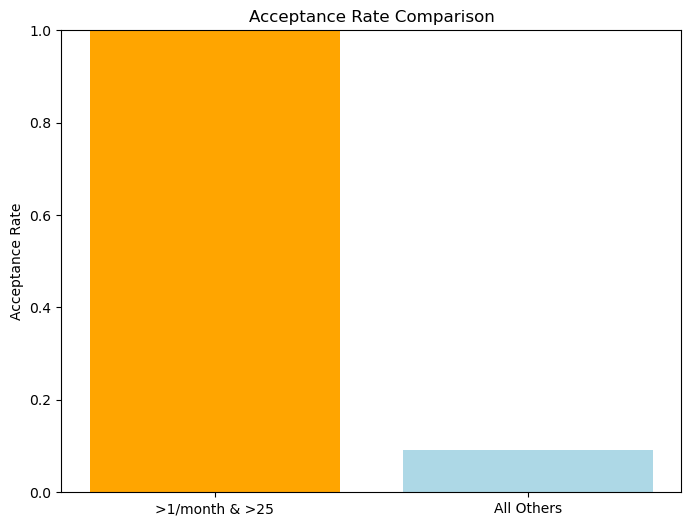

In [15]:
# Extract the starting number from the age range string
bar_data['age_num'] = bar_data['age'].str.extract(r'(\d+)').astype(float)


# Group 1: bar > 1/month and age > 25
group1 = bar_data[(bar_data['bar_freq_num'] > 1) & (bar_data['age_num'] > 25)]

# Group 2: all others
group2 = bar_data[~((bar_data['bar_freq_num'] > 1) & (bar_data['age_num'] > 25))]

# Calculate acceptance rates
group1_acceptance = group1['Y'].mean()
group2_acceptance = group2['Y'].mean()

print(f"Acceptance rate (bar >1/month & age >25): {group1_acceptance:.2f}")
print(f"Acceptance rate (all others): {group2_acceptance:.2f}")

difference = group1_acceptance - group2_acceptance
print(f"Difference in acceptance rate: {difference:.2f}")

labels = ['>1/month & >25', 'All Others']
rates = [group1_acceptance, group2_acceptance]

plt.figure(figsize=(8, 6))
plt.bar(labels, rates, color=['orange', 'lightblue'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison')
plt.ylim(0, 1)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate (bar >1/month, no kid, non-farm jobs): 1.00
Acceptance rate (all others): 0.09
Difference in acceptance rate: 0.91


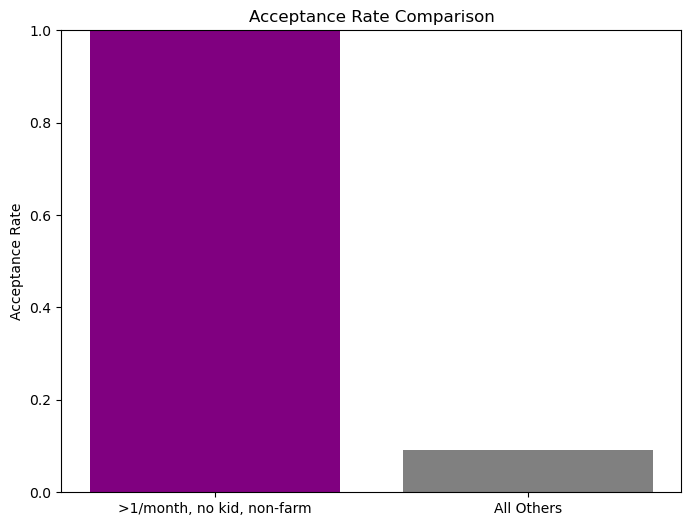

In [18]:
# Group 1 conditions
group1 = bar_data[
    (bar_data['bar_freq_num'] > 1) &
    (bar_data['passanger'] != 'Kid') &
    (~bar_data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
]

# Group 2: all others (negation of group 1)
group2 = bar_data[~(
    (bar_data['bar_freq_num'] > 1) &
    (bar_data['passanger'] != 'Kid') &
    (~bar_data['occupation'].isin(['Farming', 'Fishing', 'Forestry']))
)]

# Calculate acceptance rates
group1_acceptance = group1['Y'].mean()
group2_acceptance = group2['Y'].mean()

print(f"Acceptance rate (bar >1/month, no kid, non-farm jobs): {group1_acceptance:.2f}")
print(f"Acceptance rate (all others): {group2_acceptance:.2f}")

difference = group1_acceptance - group2_acceptance
print(f"Difference in acceptance rate: {difference:.2f}")

labels = ['>1/month, no kid, non-farm', 'All Others']
rates = [group1_acceptance, group2_acceptance]

plt.figure(figsize=(8, 6))
plt.bar(labels, rates, color=['purple', 'gray'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison')
plt.ylim(0, 1)
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate (condition group): 1.00
Acceptance rate (all others): 0.57
Difference: 0.43


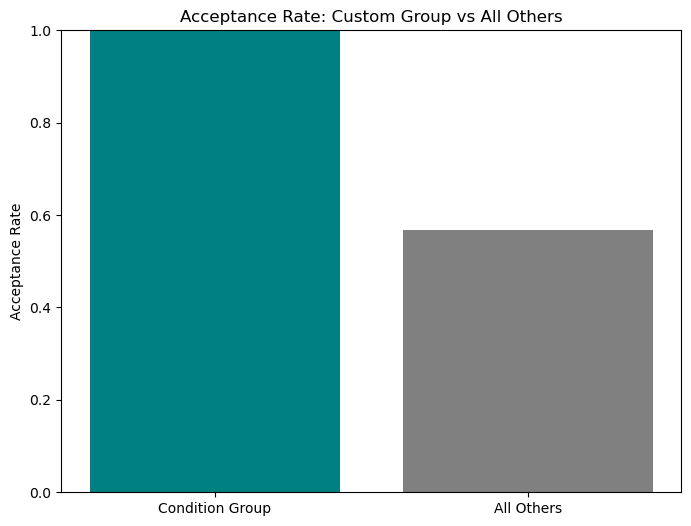

In [22]:
restaurant_mapping = {
    'never': 0,
    'less1': 0.5,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

# Create a new column with numeric values
data['restaurant20_freq_num'] = data['RestaurantLessThan20'].map(restaurant_mapping)

# Condition 1
cond1 = (
    (bar_data['bar_freq_num'] > 1) &
    (bar_data['passanger'] != 'Kid') &
    (bar_data['maritalStatus'] != 'Widowed')
)

# Condition 2
cond2 = (
    (bar_data['bar_freq_num'] > 1) &
    (bar_data['age_num'].astype(str).str.extract('(\d+)').astype(float) < 30)[0]
)

# Condition 3 (we assume 'income' is a string like '<$50K')
cond3 = (
    (data['restaurant20_freq_num'] > 4) &
    (data['income'].str.contains('<$50K') | data['income'].str.contains('$25K') | data['income'].str.contains('$30K'))
)

# Combine all conditions (OR logic)
group1 = data[cond1 | cond2 | cond3]

# Group 2: all others
group2 = data[~(cond1 | cond2 | cond3)]

group1_acceptance = group1['Y'].mean()
group2_acceptance = group2['Y'].mean()

print(f"Acceptance rate (condition group): {group1_acceptance:.2f}")
print(f"Acceptance rate (all others): {group2_acceptance:.2f}")
print(f"Difference: {group1_acceptance - group2_acceptance:.2f}")

labels = ['Condition Group', 'All Others']
rates = [group1_acceptance, group2_acceptance]

plt.figure(figsize=(8, 6))
plt.bar(labels, rates, color=['teal', 'gray'])
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate: Custom Group vs All Others')
plt.ylim(0, 1)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who are younger, socially active, and not constrained by familial or professional responsibilities (e.g., not accompanied by children, not in restrictive occupations like farming/fishing/forestry, not widowed) are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

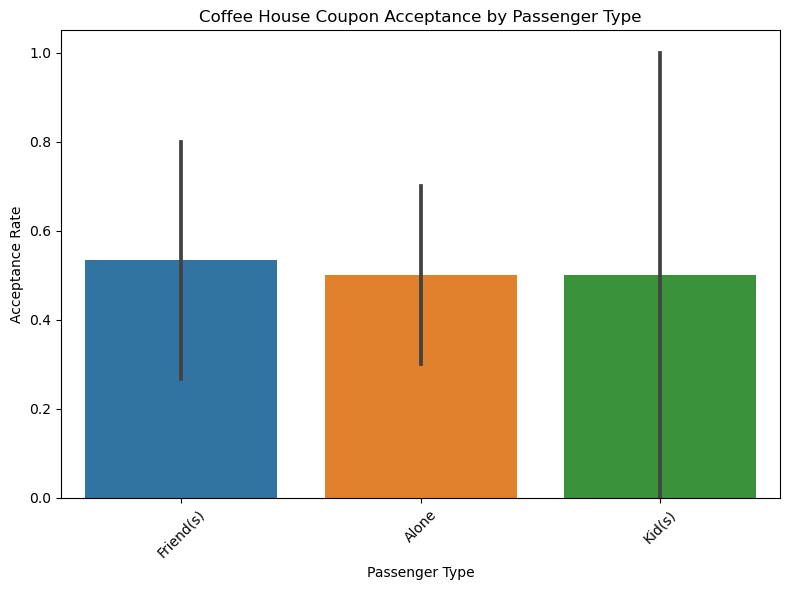

passanger
Friend(s)    0.533333
Alone        0.500000
Kid(s)       0.500000
Name: Y, dtype: float64


In [24]:
# Create a DataFrame for just coffee house coupons
coffee_data = data_cleaned[data_cleaned['coupon'] == 'Coffee House']

# Bar plot of acceptance rates by passenger type
plt.figure(figsize=(8, 6))
sns.barplot(data=coffee_data, x='passanger', y='Y', estimator='mean')
plt.title('Coffee House Coupon Acceptance by Passenger Type')
plt.ylabel('Acceptance Rate')
plt.xlabel('Passenger Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by passenger and calculate mean acceptance
acceptance_by_passenger = coffee_data.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print(acceptance_by_passenger)
